## Drugs Physicochemical Properties Dataset

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [39]:
df= pd.read_csv('train_set.csv',encoding='utf-8')
df

,name,Molar Volume,Molar Refractivity,Polarizability(x10-24),TPSA,ICHI
0,pyrazinamide,94.5,31.36,12.43,68.9,-0.092
1,dapsone,182.3,67.51,26.76,94.6,0.027
2,phenobarbitone,188.1,59.21,23.47,75.3,-0.003
3,sulphamethoxazole,173.1,62.45,24.75,107.0,-0.106
4,theophylline,122.9,43.14,17.10,69.3,-0.110
5,nitrofurantoin,131.0,53.13,21.06,121.0,-0.009
6,chlorampheniol,208.8,72.55,28.76,115.0,-0.002
7,cyclophosphamide,71.9,33.55,13.30,41.6,0.017
8,allopurinol,195.6,58.09,23.03,70.1,-0.130
9,aspirin,139.5,44.52,17.65,63.6,-0.002


In [40]:
df1 = pd.read_csv('val_set.csv',encoding='utf-8')
df1

,name,Molar Volume(cm3),Molar Refractivity(x10-24 cm3),Polarizability(cm3),TPSA,ICHI
0,metronidazole,117.8,40.98,16.24,83.9,-0.025
1,prednisolone,274.7,95.48,37.85,94.8,0.320
2,diazepam,225.8,80.91,32.07,32.7,0.610
3,chlorpheniramine,211.4,71.35,28.28,16.1,0.990


In [41]:
df.describe()

,Molar Volume,Molar Refractivity,Polarizability(x10-24),TPSA,ICHI
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,217.542500,77.502250,30.721750,75.747500,0.285375
std,72.775295,24.738359,9.806995,30.650026,0.364413
min,71.900000,31.360000,12.430000,23.500000,-0.500000
25%,175.700000,61.640000,24.430000,53.125000,-0.014250
50%,209.350000,76.145000,30.180000,69.200000,0.340000
75%,267.100000,90.685000,35.950000,93.250000,0.542500
max,401.900000,139.110000,55.150000,159.000000,1.100000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    40 non-null     object 
 1   Molar Volume            40 non-null     float64
 2   Molar Refractivity      40 non-null     float64
 3   Polarizability(x10-24)  40 non-null     float64
 4   TPSA                    40 non-null     float64
 5   ICHI                    40 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.0+ KB


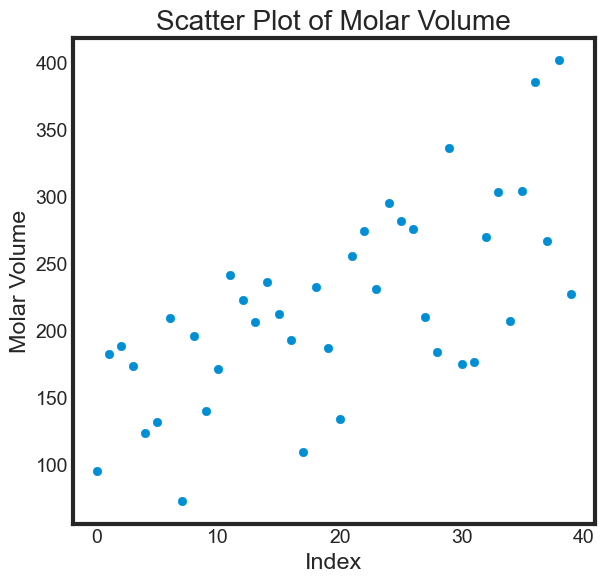

In [43]:
# Select column to check for outliers
column = 'Molar Volume'

plt.figure(figsize=(6, 6))
plt.scatter(range(len(df)), df[column])
plt.xlabel('Index')
plt.ylabel(column)
plt.title('Scatter Plot of ' + column)
plt.show()

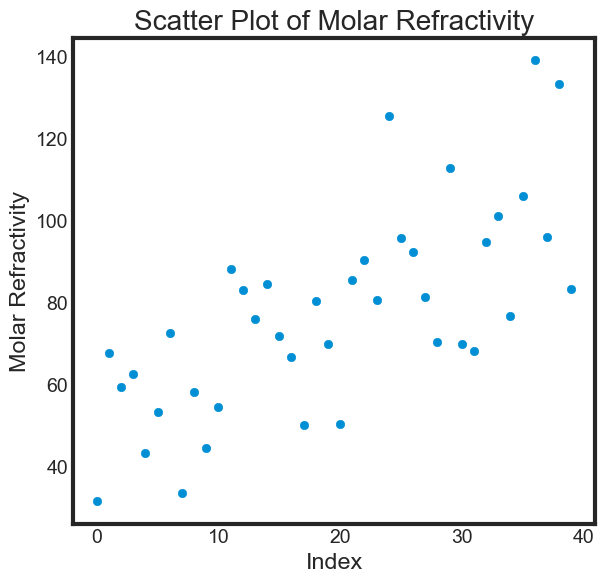

In [44]:
# Select column to check for outliers
column = 'Molar Refractivity'

plt.figure(figsize=(6, 6))
plt.scatter(range(len(df)), df[column])
plt.xlabel('Index')
plt.ylabel(column)
plt.title('Scatter Plot of ' + column)
plt.show()

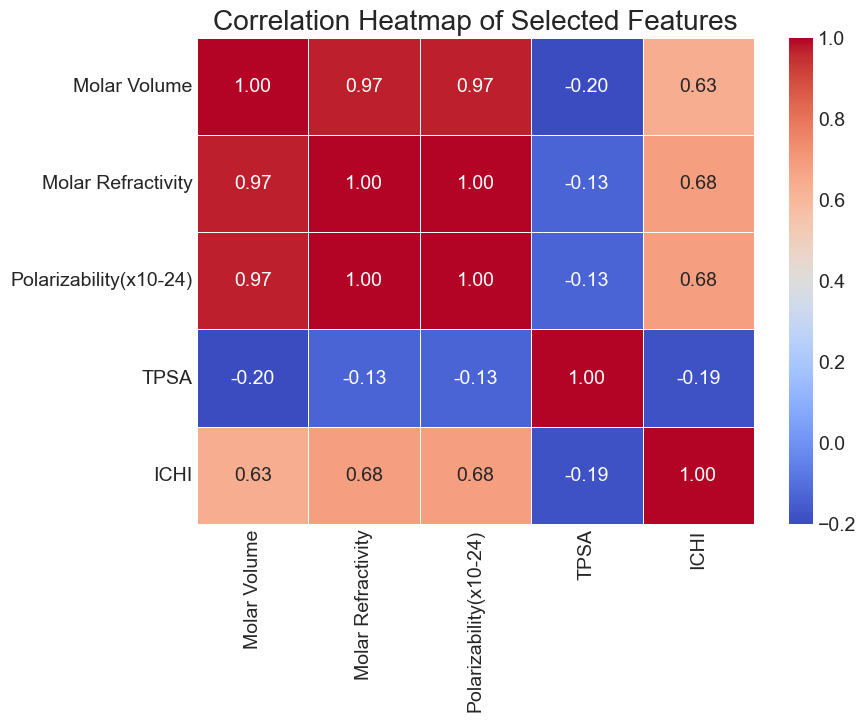

In [45]:

select_columns = df.columns[df.columns !='name'].to_list()
# Calculate correlation matrix
corr_matrix = df[select_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

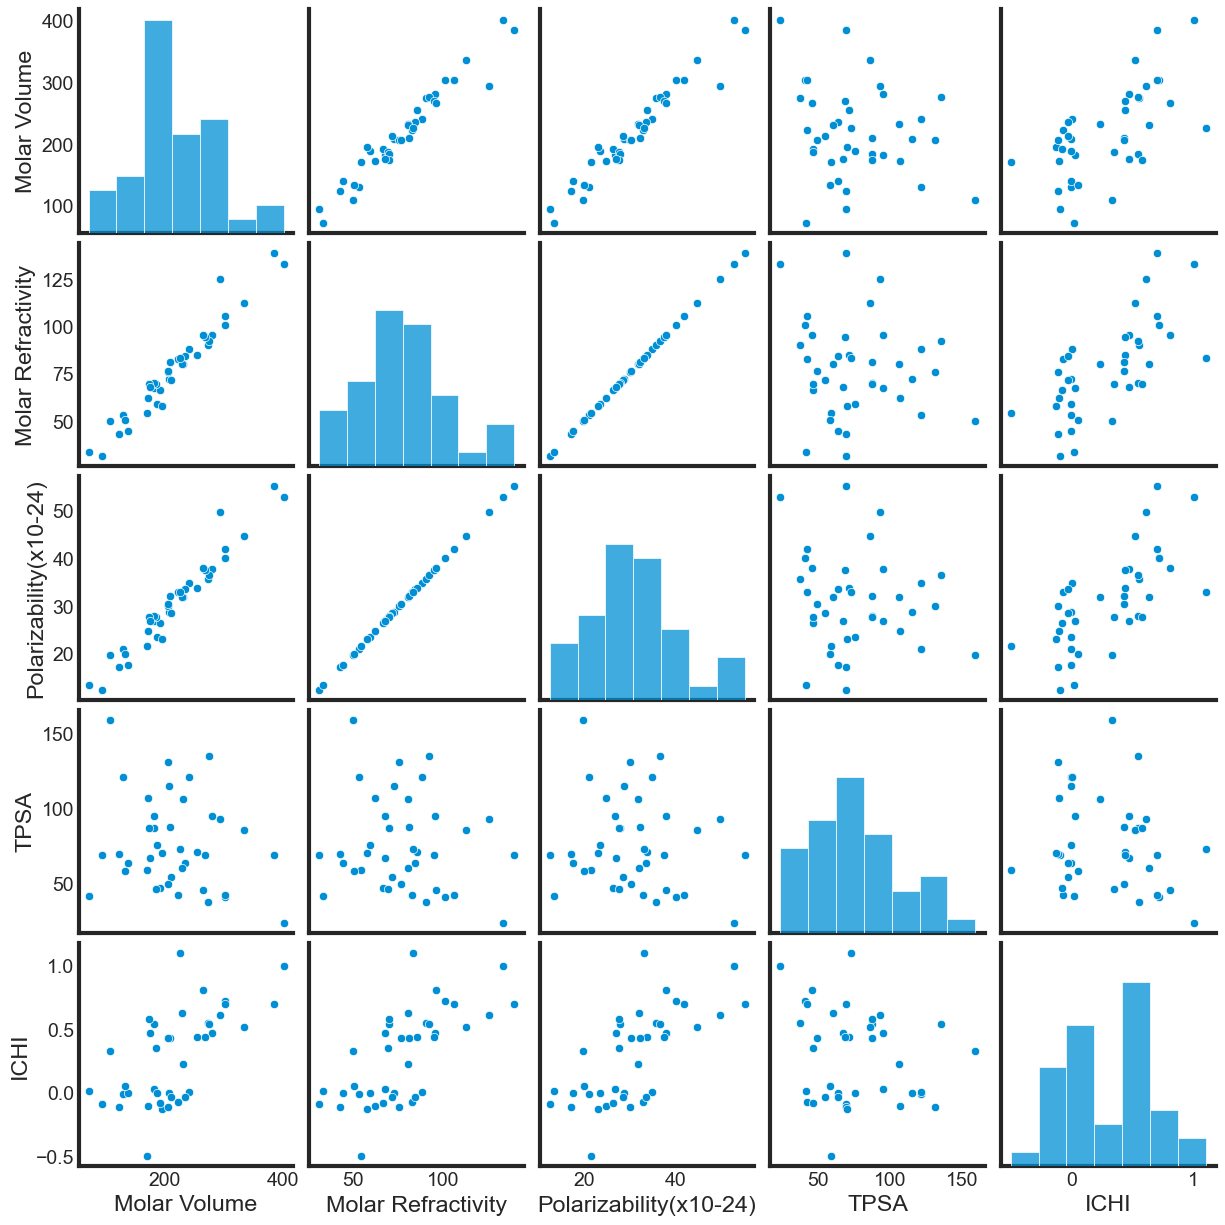

In [46]:
sns.pairplot(df[select_columns])
plt.show()

### Machine Learning

In [47]:
X = df.drop(['name','ICHI'], axis = 1)
y = df['ICHI']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
# Initialise the MinMaxScaler, Fit and Transform
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Model Building

In [49]:
# Linear Regression

# Fitting the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Evaluating Model
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.26


In [50]:
# Decision Tree

# Fitting the model
DT = DecisionTreeRegressor()
DT.fit(X_train_scaled, y_train)

# Evaluating Model
y_pred = DT.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.23


In [51]:
# Random Forest

# Fitting the model
RF = RandomForestRegressor()
RF.fit(X_train_scaled, y_train)

# Evaluating Model
y_pred = RF.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.19
